In [105]:
import os

In [106]:
os.getcwd()

'c:\\Users\\kimm0\\Downloads\\NuBank\\Test_2022'

### Importar librerías

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from unidecode import unidecode
import plotly.io as pio
import plotly.graph_objects as go

### Importar archivos csv

In [108]:
df_pmagicos = pd.read_csv('pueblos_magicos.csv')
df_turismo = pd.read_csv('turismo_mexico.csv')

### Exploratory Data Analysis de pueblos mágicos

In [109]:
print('Data de pueblos magicos')
df_pmagicos.head()

Data de pueblos magicos


,pueblo_magico,estado,pob_2010,pob_2015
0,Asientos,Aguascalientes,48358,50864
1,Calvillo,Aguascalientes,57627,60760
2,San José de Gracia,Aguascalientes,7160,9661
3,Tecate,Baja California,89999,110870
4,La Paz,Baja California Sur,265717,293687


In [110]:
df_pmagicos.tail()

,pueblo_magico,estado,pob_2010,pob_2015
118,Jerez,Zacatezas,57610,55114
119,Nochistlán de Mejía,Zacatezas,30114,26855
120,Pinos,Zacatecas,76639,76220
121,Sombrerete,Zacatecas,61188,62433
122,Teúl de González Ortega,Zacatecas,4666,5381


In [111]:
# Corregir estado
df_pmagicos['estado'].replace({'Zacatezas': 'Zacatecas'}, inplace=True)

##### 10 pueblos mágicos con la mayor población en 2015

In [112]:
# Sort df_pmagicos
sort_most = df_pmagicos.sort_values(by=['pob_2015'], ascending=False)
# Guardar 10 pueblos mágicos con la mayor población 2015
most_pop = sort_most[['pueblo_magico','pob_2015']].head(10)
most_pop

,pueblo_magico,pob_2015
44,Tlaquepaque,664193
4,La Paz,293687
48,Metepec,219270
18,San Cristóbal de las Casas,206839
117,Guadalupe,189495
113,Papantla,185272
15,Comitán de Domínguez,173188
37,Lagos de Moreno,164981
81,San Andrés Cholula,156754
67,Bahía de Banderas (Sayulita),153793


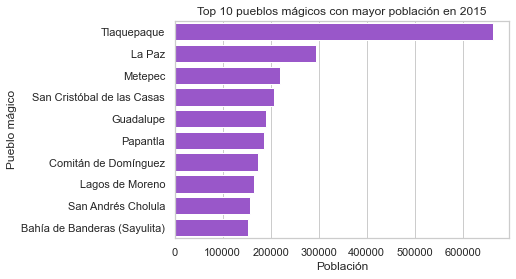

In [113]:
# Bar chart de most_pop
high = ['#9c44dc']
sns.barplot(x='pob_2015' , y='pueblo_magico', palette=high, data=most_pop).set(title='Top 10 pueblos mágicos con mayor población en 2015')
plt.xlabel('Población')
plt.ylabel('Pueblo mágico')
plt.show()

##### 10 pueblos mágicos con la menor población en 2010

In [114]:
# Sort df_pmagicos
sort_least = df_pmagicos.sort_values('pob_2010',ascending=False)
# Guardar los 10 pueblos mágicos con menor población 2010
least_pop = sort_least[['pueblo_magico', 'pob_2010']].tail(10)
least_pop

,pueblo_magico,pob_2010
33,Mineral del Chico,7830
2,San José de Gracia,7160
40,San Sebastián del Oeste,5755
122,Teúl de González Ortega,4666
74,San Pedro y San Pablo Teposcolula,3989
105,Mier,3856
68,Bustamante,3756
10,Guerrero,1946
8,Candela,1736
72,Capulálpam de Méndez,1467


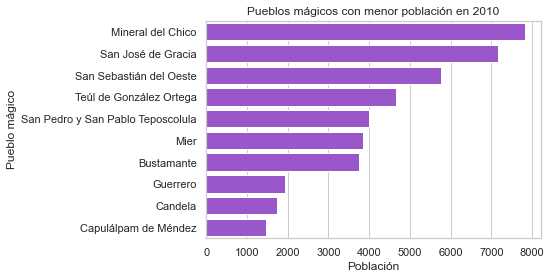

In [115]:
# Bar chart de least_pop
sns.barplot(x='pob_2010' , y='pueblo_magico', palette=high, data=least_pop).set(title='Pueblos mágicos con menor población en 2010')
plt.xlabel('Población')
plt.ylabel('Pueblo mágico')
plt.show()

##### Comportamiento del crecimiento poblacional

In [116]:
# Función para obtener crecimiento poblacional porcentual
def growth_rate(col1,col2):
    return ((col2 - col1) / col1) * 100

In [117]:
# Añadir a df_pmagicos columna de crecimiento poblacional porcentual
df_pmagicos['growth_rate'] = growth_rate(df_pmagicos['pob_2010'], df_pmagicos['pob_2015'])
df_pmagicos

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate
0,Asientos,Aguascalientes,48358,50864,5.182183
1,Calvillo,Aguascalientes,57627,60760,5.436688
2,San José de Gracia,Aguascalientes,7160,9661,34.930168
3,Tecate,Baja California,89999,110870,23.190258
4,La Paz,Baja California Sur,265717,293687,10.526237
...,...,...,...,...,...
118,Jerez,Zacatecas,57610,55114,-4.332581
119,Nochistlán de Mejía,Zacatecas,30114,26855,-10.822209
120,Pinos,Zacatecas,76639,76220,-0.546719
121,Sombrerete,Zacatecas,61188,62433,2.034713


In [118]:
df_pmagicos.dtypes

pueblo_magico     object
estado            object
pob_2010           int64
pob_2015           int64
growth_rate      float64
dtype: object

In [119]:
# Redondear valores a 2 decimales
df_pmagicos.growth_rate = df_pmagicos.growth_rate.round(2)

In [120]:
# Sort pueblos mágicos con el mayor y menor crecimiento poblacional porcentual
top_growth=df_pmagicos.sort_values('growth_rate',ascending=False).head(10)
bottom_growth=df_pmagicos.sort_values('growth_rate',ascending=False).tail(10)

In [121]:
# Concatenar top y bottom growth
frame = [top_growth, bottom_growth]
result = pd.concat(frame)
display(result)

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate
16,Chiapa de Corzo,Chiapas,82617,125567,51.99
2,San José de Gracia,Aguascalientes,7160,9661,34.93
3,Tecate,Baja California,89999,110870,23.19
81,San Andrés Cholula,Puebla,127496,156754,22.95
75,Santa María Tonameca (Mazunte),Oaxaca,28540,35088,22.94
94,Bacalar,Quintana Roo,32000,39111,22.22
117,Guadalupe,Zacatecas,155331,189495,21.99
95,Aquismón,San Luis Potosi,43274,52435,21.17
9,Cuatro Ciénegas,Coahuila,11698,14168,21.11
92,Isla Mujeres,Quintana Roo,16203,19495,20.32


[Text(0, 0, '51.99'),
 Text(0, 0, '34.93'),
 Text(0, 0, '23.19'),
 Text(0, 0, '22.95'),
 Text(0, 0, '22.94'),
 Text(0, 0, '22.22'),
 Text(0, 0, '21.99'),
 Text(0, 0, '21.17'),
 Text(0, 0, '21.11'),
 Text(0, 0, '20.32'),
 Text(0, 0, '-19.55'),
 Text(0, 0, '-21.12'),
 Text(0, 0, '-21.83'),
 Text(0, 0, '-22.91'),
 Text(0, 0, '-22.93'),
 Text(0, 0, '-23.98'),
 Text(0, 0, '-25.35'),
 Text(0, 0, '-27.21'),
 Text(0, 0, '-41.36'),
 Text(0, 0, '-59.25')]

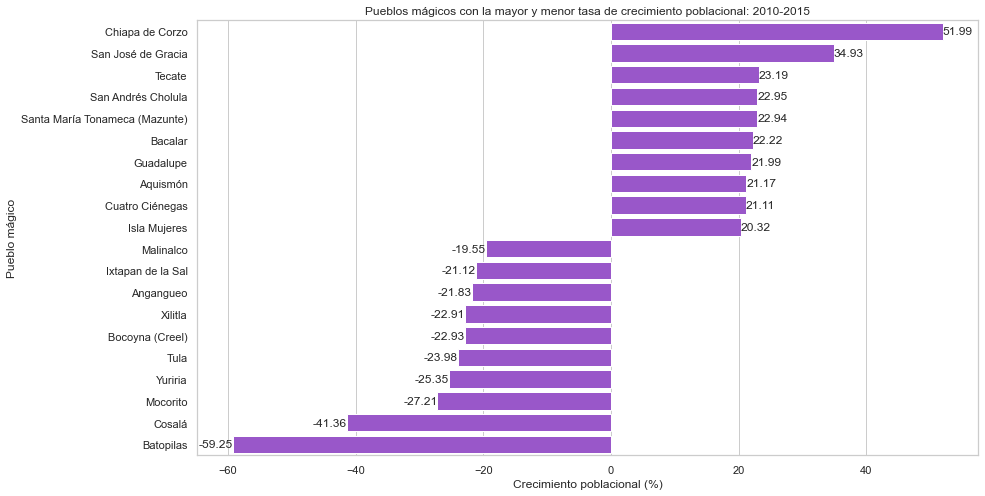

In [122]:
# Barplot de result
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='growth_rate', y='pueblo_magico', data=result, palette=high).set_title('Pueblos mágicos con la mayor y menor tasa de crecimiento poblacional: 2010-2015')
plt.xlabel('Crecimiento poblacional (%)')
plt.ylabel('Pueblo mágico')
ax.bar_label(ax.containers[0])

[Text(0, 0, '51.99'),
 Text(0, 0, '34.93'),
 Text(0, 0, '23.19'),
 Text(0, 0, '22.95'),
 Text(0, 0, '22.94'),
 Text(0, 0, '22.22'),
 Text(0, 0, '21.99'),
 Text(0, 0, '21.17'),
 Text(0, 0, '21.11'),
 Text(0, 0, '20.32'),
 Text(0, 0, '-19.55'),
 Text(0, 0, '-21.12'),
 Text(0, 0, '-21.83'),
 Text(0, 0, '-22.91'),
 Text(0, 0, '-22.93'),
 Text(0, 0, '-23.98'),
 Text(0, 0, '-25.35'),
 Text(0, 0, '-27.21'),
 Text(0, 0, '-41.36'),
 Text(0, 0, '-59.25')]

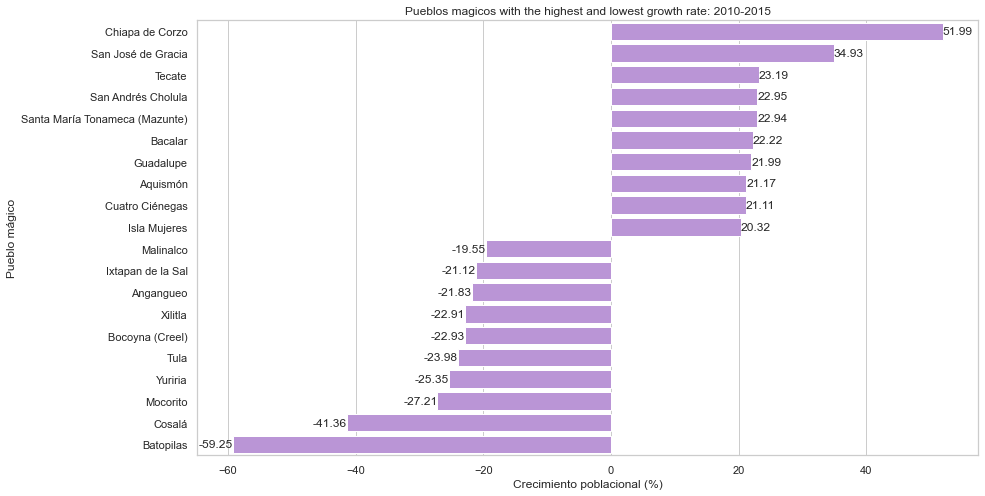

In [123]:
low = ['#bc8ae1']
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='growth_rate', y='pueblo_magico', data=result, palette=low).set_title('Pueblos magicos with the highest and lowest growth rate: 2010-2015')
plt.xlabel('Crecimiento poblacional (%)')
plt.ylabel('Pueblo mágico')
ax.bar_label(ax.containers[0])

In [124]:
# Pueblos mágicos con mayor población 2015
high_growth=df_pmagicos.sort_values('pob_2015',ascending=False).head(10)

In [125]:
# Pueblos mágicos con menor población 2010
low_growth=df_pmagicos.sort_values('pob_2010',ascending=False).tail(10)

[Text(0, 0, '9.22'),
 Text(0, 0, '10.53'),
 Text(0, 0, '-1.26'),
 Text(0, 0, '8.16'),
 Text(0, 0, '21.99'),
 Text(0, 0, '7.92'),
 Text(0, 0, '15.8'),
 Text(0, 0, '7.26'),
 Text(0, 0, '22.95'),
 Text(0, 0, '15.5')]

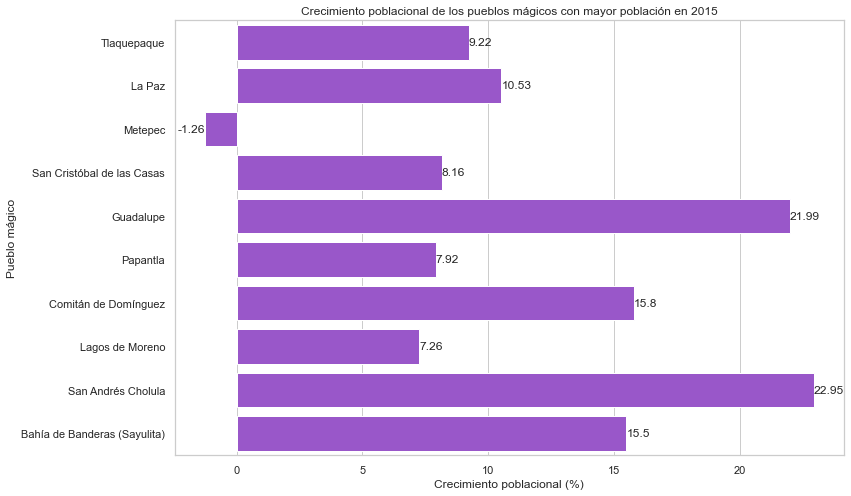

In [126]:
# Barplot de high_growth
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='growth_rate', y='pueblo_magico', data=high_growth, palette=high).set_title('Crecimiento poblacional de los pueblos mágicos con mayor población en 2015')
plt.xlabel('Crecimiento poblacional (%)')
plt.ylabel('Pueblo mágico')
ax.bar_label(ax.containers[0])

[Text(0, 0, '16.54'),
 Text(0, 0, '34.93'),
 Text(0, 0, '-1.95'),
 Text(0, 0, '15.32'),
 Text(0, 0, '0.68'),
 Text(0, 0, '15.95'),
 Text(0, 0, '5.88'),
 Text(0, 0, '-12.33'),
 Text(0, 0, '-0.46'),
 Text(0, 0, '5.59')]

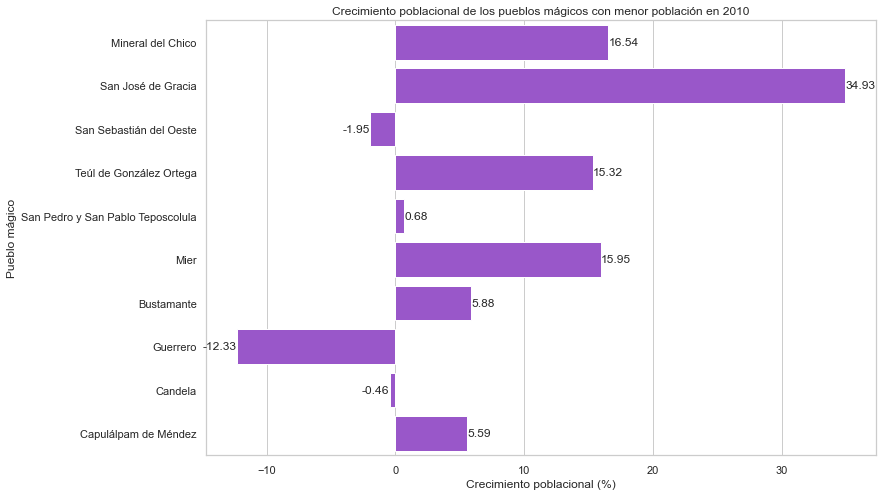

In [127]:
# Barplot de low_growth
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='growth_rate', y='pueblo_magico', data=low_growth, palette=high).set_title('Crecimiento poblacional de los pueblos mágicos con menor población en 2010')
plt.xlabel('Crecimiento poblacional (%)')
plt.ylabel('Pueblo mágico')
ax.bar_label(ax.containers[0])

### Data Wrangling, conversión de los nombres de estado a código ISO

In [128]:
# Obtener tabla de códigos ISO
url = 'https://es.wikipedia.org/wiki/ISO_3166-2:MX'
table_class = 'wikitable sortable jquery-tablesorter'
response=requests.get(url)
print(response.status_code)

200


In [129]:
# Extraer los datos del html en un objeto beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser')
mexico_table = soup.find('table',{'class':'wikitable'})

In [130]:
df = pd.read_html(str(mexico_table))
# Convertir lista a dataframe
df = pd.DataFrame(df[0])
df.head()

,Estado,Variable,RENAPO[A]​,Dos dígitos,Tres dígitos (ISO 3166-2)
0,Aguascalientes,Ags.,AS,AG,AGU
1,Baja California,B.C.,BC,BC,BCN
2,Baja California Sur,B.C.S.,BS,BS,BCS
3,Campeche,Camp.,CC,CM,CAM
4,Chiapas,Chis.,CS,CS,CHP


In [131]:
# Drop columnas
data = df.drop(df.columns[1:4], axis=1)
# Renombrar columnas
iso = data.rename(columns={'Tres dígitos (ISO 3166-2)':'ISO code'})
print(iso.head())

                Estado ISO code
0       Aguascalientes      AGU
1      Baja California      BCN
2  Baja California Sur      BCS
3             Campeche      CAM
4              Chiapas      CHP


In [132]:
# Crear diccionario de estado como key e iso code como value
d = iso.set_index('Estado')['ISO code'].to_dict()
# Eliminación del último elemento Notas
d.popitem()
print(d)

{'Aguascalientes': 'AGU', 'Baja California': 'BCN', 'Baja California Sur': 'BCS', 'Campeche': 'CAM', 'Chiapas': 'CHP', 'Chihuahua': 'CHH', 'Ciudad de México': 'CMX[C]\u200b', 'Coahuila': 'COA', 'Colima': 'COL', 'Durango': 'DUR', 'Guanajuato': 'GUA', 'Guerrero': 'GRO', 'Hidalgo': 'HID', 'Jalisco': 'JAL', 'México': 'MEX', 'Michoacán': 'MIC', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NLE', 'Oaxaca': 'OAX', 'Puebla': 'PUE', 'Querétaro': 'QUE', 'Quintana Roo': 'ROO', 'San Luis Potosí': 'SLP', 'Sinaloa': 'SIN', 'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLA', 'Veracruz': 'VER', 'Yucatán': 'YUC', 'Zacatecas': 'ZAC'}


In [133]:
# Remover acentos para estandarizar con la data original
new_dict = {}
for k, v in d.items():
    new_dict[unidecode(u'{0}'.format(k))] = v

In [134]:
# Arreglar value de Ciudad de Mexico
new_dict['Ciudad de Mexico'] = 'CDMX'
print(new_dict)

{'Aguascalientes': 'AGU', 'Baja California': 'BCN', 'Baja California Sur': 'BCS', 'Campeche': 'CAM', 'Chiapas': 'CHP', 'Chihuahua': 'CHH', 'Ciudad de Mexico': 'CDMX', 'Coahuila': 'COA', 'Colima': 'COL', 'Durango': 'DUR', 'Guanajuato': 'GUA', 'Guerrero': 'GRO', 'Hidalgo': 'HID', 'Jalisco': 'JAL', 'Mexico': 'MEX', 'Michoacan': 'MIC', 'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo Leon': 'NLE', 'Oaxaca': 'OAX', 'Puebla': 'PUE', 'Queretaro': 'QUE', 'Quintana Roo': 'ROO', 'San Luis Potosi': 'SLP', 'Sinaloa': 'SIN', 'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM', 'Tlaxcala': 'TLA', 'Veracruz': 'VER', 'Yucatan': 'YUC', 'Zacatecas': 'ZAC'}


In [135]:
# Valores únicos en estado
df_pmagicos['estado'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua',
       'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Mexico', 'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon',
       'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz', 'Yucatan', 'Zacatecas'], dtype=object)

In [136]:
# Cambio del nombre de los estados al código ISO y guardado en estado_iso
estado_iso = df_pmagicos.replace({'estado': new_dict})
print(estado_iso)

               pueblo_magico estado  pob_2010  pob_2015  growth_rate
0                   Asientos    AGU     48358     50864         5.18
1                   Calvillo    AGU     57627     60760         5.44
2         San José de Gracia    AGU      7160      9661        34.93
3                     Tecate    BCN     89999    110870        23.19
4                     La Paz    BCS    265717    293687        10.53
..                       ...    ...       ...       ...          ...
118                    Jerez    ZAC     57610     55114        -4.33
119      Nochistlán de Mejía    ZAC     30114     26855       -10.82
120                    Pinos    ZAC     76639     76220        -0.55
121               Sombrerete    ZAC     61188     62433         2.03
122  Teúl de González Ortega    ZAC      4666      5381        15.32

[123 rows x 5 columns]


In [137]:
# Desplegar valores únicos
uniqueValues = estado_iso['estado'].unique()
print(uniqueValues)

['AGU' 'BCN' 'BCS' 'CAM' 'COA' 'COL' 'CHP' 'CHH' 'DUR' 'GUA' 'GRO' 'HID'
 'JAL' 'MEX' 'MIC' 'MOR' 'NAY' 'NLE' 'OAX' 'PUE' 'QUE' 'ROO' 'SLP' 'SIN'
 'SON' 'TAB' 'TAM' 'TLA' 'VER' 'YUC' 'ZAC']


### Análisis del histórico de turismo internacional en México

In [138]:
# Review de df_turismo
df_turismo.head()

,fecha,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas _fronterizos,pasajeros_crucero
0,01/01/16,7808,1690,1152,4332,634
1,01/02/16,7666,1683,1048,4250,685
2,01/03/16,8625,1983,1224,4678,739
3,01/04/16,7717,1601,1083,4451,582
4,01/05/16,7665,1548,1154,4538,424


In [139]:
print('Data de turismo')
display(df_turismo.info())

Data de turismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   fecha                        71 non-null     object
 1   visitantes_internacionales   71 non-null     int64 
 2   turismo_al_interior          71 non-null     int64 
 3   turismo_fronterizo           71 non-null     int64 
 4   excursionistas _fronterizos  71 non-null     int64 
 5   pasajeros_crucero            71 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.5+ KB


None

In [140]:
# Convertir columna fecha a datetime
df_turismo['fecha'] = pd.to_datetime(df_turismo['fecha'], format='%d/%m/%y')

In [141]:
df_turismo.dtypes

fecha                          datetime64[ns]
visitantes_internacionales              int64
turismo_al_interior                     int64
turismo_fronterizo                      int64
excursionistas _fronterizos             int64
pasajeros_crucero                       int64
dtype: object

In [142]:
# Resumen estadístico de df_turismo
df_turismo.describe()

,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas _fronterizos,pasajeros_crucero
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,6881.507042,1640.098592,1362.591549,3379.760563,499.084507
std,2037.800873,570.944585,300.284179,1128.337202,330.665508
min,2227.000000,85.000000,691.000000,1103.000000,0.000000
25%,4974.000000,1362.000000,1153.000000,1920.500000,229.000000
50%,7790.000000,1752.000000,1366.000000,3783.000000,529.000000
75%,8223.500000,1990.000000,1542.000000,4306.500000,801.500000
max,9613.000000,2715.000000,1999.000000,4678.000000,1084.000000


In [143]:
# Arreglar nombre de columna
df_turismo.rename(columns={'excursionistas _fronterizos': 'excursionistas_fronterizos'}, inplace=True)

In [144]:
# Agrupar tipos de turismo por año
history = df_turismo.groupby(df_turismo['fecha'].dt.strftime('%Y')).agg({'visitantes_internacionales':'sum',
                        'turismo_al_interior':'sum',
                        'turismo_fronterizo':'sum',
                        'excursionistas_fronterizos':'sum',
                        'pasajeros_crucero':'sum'}).reset_index()
display(history)

,fecha,visitantes_internacionales,turismo_al_interior,turismo_fronterizo,excursionistas_fronterizos,pasajeros_crucero
0,2016,94853,20662,14416,53078,6695
1,2017,99351,22482,16808,52377,7681
2,2018,96497,23308,18008,46913,8272
3,2019,97406,23758,21267,43287,9096
4,2020,51127,10815,13469,24264,2580
5,2021,49353,15422,12776,20044,1111


In [145]:
# Añadir cambio poblacional a cada tipo de turismo
visit_perc = history.visitantes_internacionales.pct_change().mul(100).round(2)
history.insert(2, 'visit_perc',visit_perc)
int_perc = history.turismo_al_interior.pct_change().mul(100).round(2)
history.insert(4, 'int_perc', int_perc)
fron_perc=history.turismo_fronterizo.pct_change().mul(100).round(2)
history.insert(6, 'fron_perc', fron_perc)
exc_perc=history.excursionistas_fronterizos.pct_change().mul(100).round(2)
history.insert(8, 'exc_perc', exc_perc)
cruc_perc=history.pasajeros_crucero.pct_change().mul(100).round(2)
history.insert(10, 'cruc_perc', cruc_perc)

In [146]:
history

,fecha,visitantes_internacionales,visit_perc,turismo_al_interior,int_perc,turismo_fronterizo,fron_perc,excursionistas_fronterizos,exc_perc,pasajeros_crucero,cruc_perc
0,2016,94853,NaN,20662,NaN,14416,NaN,53078,NaN,6695,NaN
1,2017,99351,4.74,22482,8.81,16808,16.59,52377,-1.32,7681,14.73
2,2018,96497,-2.87,23308,3.67,18008,7.14,46913,-10.43,8272,7.69
3,2019,97406,0.94,23758,1.93,21267,18.10,43287,-7.73,9096,9.96
4,2020,51127,-47.51,10815,-54.48,13469,-36.67,24264,-43.95,2580,-71.64
5,2021,49353,-3.47,15422,42.60,12776,-5.15,20044,-17.39,1111,-56.94


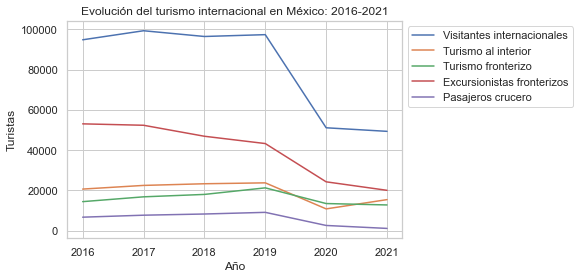

In [147]:
# Line plot de history
sns.set(style='whitegrid')
history.plot(x='fecha', y=['visitantes_internacionales', 'turismo_al_interior','turismo_fronterizo','excursionistas_fronterizos','pasajeros_crucero']).set(title='Evolución del turismo internacional en México: 2016-2021')
plt.legend(bbox_to_anchor=(1, 1), loc=2, labels=['Visitantes internacionales', 'Turismo al interior', 'Turismo fronterizo', 'Excursionistas fronterizos', 'Pasajeros crucero'])
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.show()

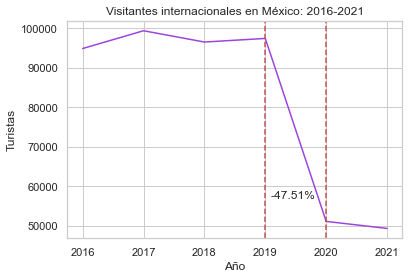

In [148]:
# Lineplot de visitantes internacionales
c='#9c44dc'
sns.set_style('whitegrid')
sns.lineplot(x='fecha', y='visitantes_internacionales', data=history, color=c).set(title='Visitantes internacionales en México: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.axvline('2019',linestyle='--',color='r')
plt.axvline('2020',linestyle='--',color='r')
plt.text(0.31, 0.02,'-47.51%', ha='right', va='baseline', transform=ax.transAxes)
plt.show()

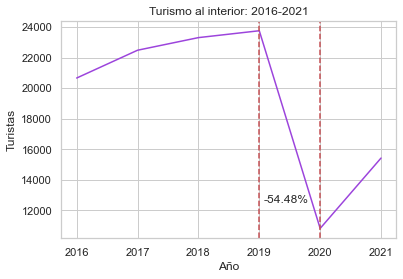

In [149]:
# Lineplot de turismo al interior
sns.set_style('whitegrid')
sns.lineplot(x='fecha', y='turismo_al_interior', data=history, color=c).set(title='Turismo al interior: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.axvline('2019',linestyle='--',color='r')
plt.axvline('2020',linestyle='--',color='r')
plt.text(0.3, 0.01,'-54.48%', ha='right', va='baseline', transform=ax.transAxes)
plt.show()

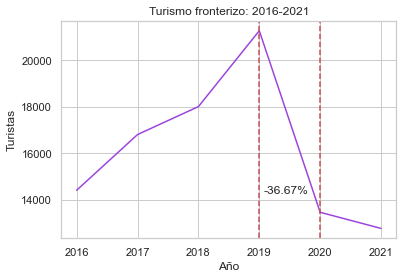

In [150]:
# Lineplot de turismo fronterizo
sns.set_style('whitegrid')
sns.lineplot(x='fecha', y='turismo_fronterizo', data=history, color=c).set(title='Turismo fronterizo: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.axvline('2019',linestyle='--',color='r')
plt.axvline('2020',linestyle='--',color='r')
plt.text(0.3, 0.03,'-36.67%', ha='right', va='baseline', transform=ax.transAxes)
plt.show()

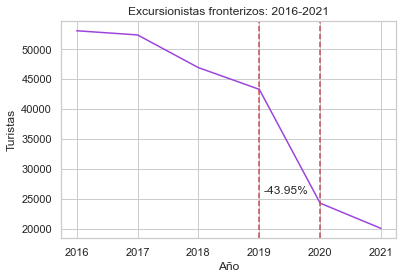

In [151]:
# Lineplot de excursionistas fronterizos
sns.set_style('whitegrid')
sns.lineplot(x='fecha', y='excursionistas_fronterizos', data=history, color=c).set(title='Excursionistas fronterizos: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.axvline('2019',linestyle='--',color='r')
plt.axvline('2020',linestyle='--',color='r')
plt.text(0.3, 0.03,'-43.95%', ha='right', va='baseline', transform=ax.transAxes)
plt.show()

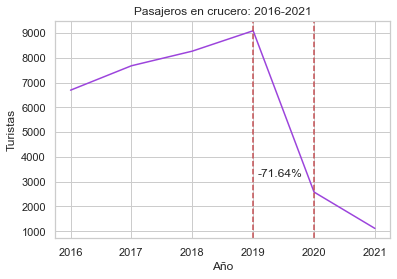

In [193]:
# Lineplot de pasajeros en crucero
sns.set_style('whitegrid')
sns.lineplot(x='fecha', y='pasajeros_crucero', data=history, color=c).set(title='Pasajeros en crucero: 2016-2021')
plt.xlabel('Año')
plt.ylabel('Turistas')
plt.axvline('2019',linestyle='--',color='r')
plt.axvline('2020',linestyle='--',color='r')
plt.text(0.29, 0.07,'-71.64%', ha='right', va='baseline', transform=ax.transAxes)
plt.show()

### Creativity to communicate analytical results

##### Estados con mayor número de pueblos mágicos

In [153]:
# Pueblos magicos por estado
print('Conteo de pueblos magicos por estado')
pueblos_per_edo = df_pmagicos.groupby('estado').agg({'pueblo_magico':'nunique'}).reset_index()
pueblos_per_edo.head()

Conteo de pueblos magicos por estado


,estado,pueblo_magico
0,Aguascalientes,3
1,Baja California,1
2,Baja California Sur,2
3,Campeche,1
4,Chiapas,4


In [154]:
# Pueblos magicos por state y población
print('Conteo de pueblos magicos por estado y población en 2010 y 2015')
estado_group = df_pmagicos.groupby('estado').agg({'pueblo_magico':'nunique',
                                                    'pob_2010':sum,
                                                    'pob_2015':sum}).reset_index()
estado_group.head()

Conteo de pueblos magicos por estado y población en 2010 y 2015


,estado,pueblo_magico,pob_2010,pob_2015
0,Aguascalientes,3,113145,121285
1,Baja California,1,89999,110870
2,Baja California Sur,2,284255,315732
3,Campeche,1,9605,9092
4,Chiapas,4,544634,631594


In [155]:
# Añadir cambio poblacional
estado_group['growth_rate'] = growth_rate(estado_group['pob_2010'], estado_group['pob_2015'])

In [156]:
estado_group.head()

,estado,pueblo_magico,pob_2010,pob_2015,growth_rate
0,Aguascalientes,3,113145,121285,7.194308
1,Baja California,1,89999,110870,23.190258
2,Baja California Sur,2,284255,315732,11.073508
3,Campeche,1,9605,9092,-5.340968
4,Chiapas,4,544634,631594,15.966686


In [157]:
# Sort top 10 estados con mayor número de pueblos magicos
sort_edo = pueblos_per_edo.sort_values('pueblo_magico',ascending=False).head(10)
sort_edo

,estado,pueblo_magico
19,Puebla,10
13,Mexico,10
12,Jalisco,8
14,Michoacan,8
6,Coahuila,7
30,Zacatecas,6
28,Veracruz,6
20,Queretaro,6
9,Guanajuato,6
11,Hidalgo,6


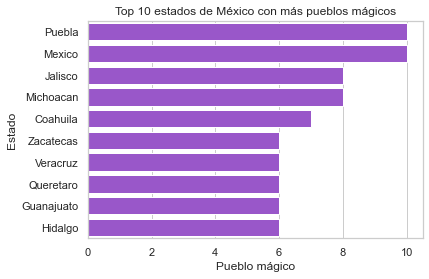

In [158]:
# Barplot de sort_edo
high = ['#9c44dc']
sns.barplot(x='pueblo_magico' , y='estado', palette=high, data=sort_edo).set(title='Top 10 estados de México con más pueblos mágicos')
plt.xlabel('Pueblo mágico')
plt.ylabel('Estado')
plt.show()

In [159]:
print(pueblos_per_edo['pueblo_magico'].sum())

123


In [160]:
df_pmagicos

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate
0,Asientos,Aguascalientes,48358,50864,5.18
1,Calvillo,Aguascalientes,57627,60760,5.44
2,San José de Gracia,Aguascalientes,7160,9661,34.93
3,Tecate,Baja California,89999,110870,23.19
4,La Paz,Baja California Sur,265717,293687,10.53
...,...,...,...,...,...
118,Jerez,Zacatecas,57610,55114,-4.33
119,Nochistlán de Mejía,Zacatecas,30114,26855,-10.82
120,Pinos,Zacatecas,76639,76220,-0.55
121,Sombrerete,Zacatecas,61188,62433,2.03


##### Crear mapa de pueblos mágicos por estado

In [161]:
# Importar códigos postales
pcodes = pd.read_excel('postal_codes.xlsx', sheet_name='Sheet1')
pcodes['d_estado'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [162]:
# Estandarizar nombre de estados con la data original
pcodes['d_estado'].replace({'Coahuila de Zaragoza': 'Coahuila','México':'Mexico','Michoacán de Ocampo':'Michoacan','Nuevo León':'Nuevo Leon',
                            'Querétaro':'Queretaro', 'San Luis Potosí':'San Luis Potosi','Veracruz de Ignacio de la Llave': 'Veracruz','Yucatán':'Yucatan'}, inplace=True)
pcodes['d_estado'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua',
       'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'Mexico', 'Michoacan', 'Morelos', 'Nayarit',
       'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'], dtype=object)

In [163]:
# Estandarizar nombre de los pueblos mágicos
pcodes['d_asenta'].replace({'Calvillo Centro': 'Calvillo','Asientos Centro': 'Asientos','La Paz (Gral. Manuel Márquez de León)': 'La Paz',
                            'Loreto (Loreto)':'Loreto','Palizada Centro': 'Palizada','Arteaga Centro': 'Arteaga','Cuatro Ciénegas de Carranza Centro': 'Cuatro Ciénegas',
                            'Viesca Centro': 'Viesca','Comitán de Domínguez Centro': 'Comitán de Domínguez','Chiapa de Corzo Centro': 'Chiapa de Corzo',
                            'San Cristóbal de las Casas Centro': 'San Cristóbal de las Casas'}, inplace=True)

In [164]:
pcodes['d_asenta'].replace({'Bocoyna':'Bocoyna (Creel)','Comonfort Centro':'Comonfort','Centro Dolores Hidalgo':'Dolores Hidalgo Cuna de la Independencia Nacional',
                            'Jalpa de Cánovas':'Purísima del Rincón (Jalpa de Cánovas)','Salvatierra Centro':'Salvatierra','San Luis de La Paz Centro':'San Luis de la Paz (Mineral de pozos)',
                            'Yuriria Centro':'Yuriria','Taxco de Alarcón Centro':'Taxco de Alarcón','Huasca de Ocampo Centro':'Huasca de Ocampo','Huichapan Centro':'Huichapan',
                            'Mineral del Chico Centro':'Mineral del Chico','Mineral del Monte Centro':'Mineral del Monte','Lagos de Moreno Centro':'Lagos de Moreno',
                            'Talpa de Allende Centro':'Talpa de Allende','Tequila Centro':'Tequila','Tlaquepaque Centro':'Tlaquepaque','Aculco de Espinoza':'Aculco',
                            'Metepec Centro':'Metepec','El Oro de Hidalgo':'El Oro','San Martín de las Pirámides Centro':'San Martín de las Pirámides',
                            'Teotihuacan de Arista Centro':'Teotihuacán','Tepotzotlán Centro':'Tepotzotlán','Mineral de Angangueo':'Angangueo','Cuitzeo del Porvenir Centro':'Cuitzeo',
                            'Jiquilpan de Juárez Centro':'Jiquilpan','Salvador Escalante':'Salvador Escalante (Santa Clara del Cobre)','Tacambaro de Codallos Centro':'Tacámbaro',
                            'Tepoztlán Centro':'Tepoztlán','Compostela Centro':'Compostela','Jala Centro':'Jala','Bahía de Banderas':'Bahía de Banderas (Sayulita)','Linares Centro':'Linares',
                            'Santiago Centro':'Santiago','Santa María Tonameca Centro':'Santa María Tonameca (Mazunte)','Atlixco Centro':'Atlixco','Ciudad de Cuetzalan':'Cuetzalan del Progreso',
                            'Ciudad de Pahuatlán de Valle':'Pahuatlán','Cholula de Rivadabia Centro':'San Pedro Cholula','Xicotepec de Juárez Centro':'Xicotepec','Zacatlán Centro':'Zacatlán',
                            'Amealco de Bonfil Centro':'Amealco de Bonfil','Ezequiel Montes Centro':'Ezequiel Montes (Bernal)','Tequisquiapan Centro':'Tequisquiapan','Tulum Centro':'Tulum',
                            'Bacalar Centro':'Bacalar','Real de Catorce':'Catorce','Cosala Centro':'Cosalá','Mocorito Centro':'Mocorito','Rosario Uzarraga':'Rosario','Álamos Centro':'Álamos',
                            'Magdalena de Kino Centro':'Magdalena','Tapijulapa':'Tacotalpa (Tapijulapa)','Mier Centro':'Mier','Ciudad Tula Centro':'Tula','Huamantla Centro':'Huamantla',
                            'Coatepec Centro':'Coatepec','Coscomatepec de Bravo Centro':'Coscomatepec','Orizaba Centro':'Orizaba','Papantla Centro':'Papantla','Valladolid Centro':'Valladolid',
                            'Nochistlan Centro':'Nochistlán de Mejía','Sombrerete Centro':'Sombrerete','Bocoyna (Creel)':'Bocoyna'}, inplace=True)

,d_codigo,d_asenta,d_mnpio,d_ciudad,d_estado,lat,lon
103673,76500,Centro,Cadereyta de Montes,NaN,Queretaro,20.8524,-99.7995
103674,76503,Los Llanitos,Cadereyta de Montes,NaN,Queretaro,20.7679,-99.8516
103675,76503,El Paraíso,Cadereyta de Montes,NaN,Queretaro,20.7679,-99.8516
103676,76504,Las Fuentes,Cadereyta de Montes,NaN,Queretaro,20.6528,-99.9042
103677,76504,Fuentes y Pueblo Nuevo,Cadereyta de Montes,NaN,Queretaro,20.6528,-99.9042
...,...,...,...,...,...,...,...
103900,76548,Boyecito,Cadereyta de Montes,NaN,Queretaro,20.5955,-99.7392
103901,76548,La Puerta,Cadereyta de Montes,NaN,Queretaro,20.5955,-99.7392
103902,76548,Yexthó Chico,Cadereyta de Montes,NaN,Queretaro,20.5955,-99.7392
103903,76548,El Charcón,Cadereyta de Montes,NaN,Queretaro,20.5955,-99.7392


In [169]:
# Estandarizar nombre de pueblos mágicos en pcodes
pcodes.at[103205,'d_asenta']='Jalpan de Serra'
pcodes.at[103673,'d_asenta']='Cadereyta de Montes'
pcodes.at[19970,'d_asenta']='Casas Grandes'
pcodes.at[52770,'d_asenta']='Zimapán'
pcodes.at[24203,'d_asenta']='Bocoyna (Creel)'
pcodes.at[53290,'d_asenta']='Tecozautla'
pcodes.at[7764,'d_asenta']='Múzquiz'
pcodes.at[144094,'d_asenta']='Pinos'
pcodes.at[33003,'d_asenta']='Nombre de Dios'

In [173]:
# Merge df_pmagicos y pcodes
df_postal = df_pmagicos.merge(pcodes, how='left', left_on=['pueblo_magico','estado'], right_on=['d_asenta','d_estado'])
df_postal

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate,d_codigo,d_asenta,d_mnpio,d_ciudad,d_estado,lat,lon
0,Asientos,Aguascalientes,48358,50864,5.18,20710,Asientos,Asientos,Asientos,Aguascalientes,22.2297,-102.105
1,Calvillo,Aguascalientes,57627,60760,5.44,20800,Calvillo,Calvillo,Calvillo,Aguascalientes,21.8614,-102.7027
2,San José de Gracia,Aguascalientes,7160,9661,34.93,20500,San José de Gracia,San José de Gracia,NaN,Aguascalientes,22.1483,-102.4158
3,Tecate,Baja California,89999,110870,23.19,21432,Tecate,Tecate,Tecate,Baja California,32.5672,-116.6251
4,La Paz,Baja California Sur,265717,293687,10.53,23206,La Paz,La Paz,NaN,Baja California Sur,24.0339,-110.3578
...,...,...,...,...,...,...,...,...,...,...,...,...
133,Jerez,Zacatecas,57610,55114,-4.33,99322,Jerez,Jerez,Jerez de García Salinas,Zacatecas,22.6486,-102.9903
134,Nochistlán de Mejía,Zacatecas,30114,26855,-10.82,99900,Nochistlán de Mejía,Nochistlán de Mejía,Nochistlán de Mejía,Zacatecas,21.2667,-102.8833
135,Pinos,Zacatecas,76639,76220,-0.55,98920,Pinos,Pinos,NaN,Zacatecas,22.5324,-101.4898
136,Sombrerete,Zacatecas,61188,62433,2.03,99100,Sombrerete,Sombrerete,Sombrerete,Zacatecas,23.6498,-103.6934


In [187]:
# Identificar pueblos mágicos faltantes
df_postal[df_postal['lat'].isna()]

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate,d_codigo,d_asenta,d_estado,lat,lon


In [176]:
df_postal.drop_duplicates(subset=['pueblo_magico', 'estado'], inplace= True)

In [177]:
df_postal.loc[20:40]

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate,d_codigo,d_asenta,d_mnpio,d_ciudad,d_estado,lat,lon
20,Batopilas,Chihuahua,14998,6111,-59.25,33400,Batopilas,Batopilas de Manuel Gómez Morín,NaN,Chihuahua,26.8637,-107.7505
21,Bocoyna (Creel),Chihuahua,30463,23479,-22.93,33190,Bocoyna (Creel),Guachochi,NaN,Chihuahua,27.1855,-106.9738
25,Casas Grandes,Chihuahua,10993,12605,14.66,31850,Casas Grandes,Casas Grandes,NaN,Chihuahua,30.4167,-107.9667
26,Mapimí,Durango,28634,32198,12.45,35200,Mapimí,Mapimí,NaN,Durango,25.8338,-103.8461
27,Nombre de Dios,Durango,20870,17809,-14.67,34570,Nombre de Dios,Tamazula,NaN,Durango,25.52,-106.7226
32,Comonfort,Guanajuato,75326,74866,-0.61,38200,Comonfort,Comonfort,Comonfort,Guanajuato,20.7493,-100.7826
33,Dolores Hidalgo Cuna de la Independencia Nacional,Guanajuato,144333,146574,1.55,37800,Dolores Hidalgo Cuna de la Independencia Nacional,Dolores Hidalgo Cuna de la Independencia Nacional,Dolores Hidalgo Cuna de la Independencia Nacional,Guanajuato,21.1417,-100.9419
34,Purísima del Rincón (Jalpa de Cánovas),Guanajuato,71621,85203,18.96,36433,Purísima del Rincón (Jalpa de Cánovas),Purísima del Rincón,NaN,Guanajuato,20.8753,-101.9864
35,Salvatierra,Guanajuato,106631,89381,-16.18,38900,Salvatierra,Salvatierra,Salvatierra,Guanajuato,20.2159,-100.8781
36,San Luis de la Paz (Mineral de pozos),Guanajuato,119983,117722,-1.88,37900,San Luis de la Paz (Mineral de pozos),San Luis de la Paz,San Luis de la Paz,Guanajuato,21.2906,-100.5488


In [178]:
df_postal[df_postal[['pueblo_magico', 'estado']].duplicated() == True]

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate,d_codigo,d_asenta,d_mnpio,d_ciudad,d_estado,lat,lon


In [179]:
df_postal.pueblo_magico.nunique()

123

In [180]:
df_postal.duplicated(subset='pueblo_magico').sum()

0

In [181]:
df_postal.drop(['d_mnpio','d_ciudad'], axis=1, inplace=True)

In [185]:
df_postal

,pueblo_magico,estado,pob_2010,pob_2015,growth_rate,d_codigo,d_asenta,d_estado,lat,lon
0,Asientos,Aguascalientes,48358,50864,5.18,20710,Asientos,Aguascalientes,22.2297,-102.105
1,Calvillo,Aguascalientes,57627,60760,5.44,20800,Calvillo,Aguascalientes,21.8614,-102.7027
2,San José de Gracia,Aguascalientes,7160,9661,34.93,20500,San José de Gracia,Aguascalientes,22.1483,-102.4158
3,Tecate,Baja California,89999,110870,23.19,21432,Tecate,Baja California,32.5672,-116.6251
4,La Paz,Baja California Sur,265717,293687,10.53,23206,La Paz,Baja California Sur,24.0339,-110.3578
...,...,...,...,...,...,...,...,...,...,...
133,Jerez,Zacatecas,57610,55114,-4.33,99322,Jerez,Zacatecas,22.6486,-102.9903
134,Nochistlán de Mejía,Zacatecas,30114,26855,-10.82,99900,Nochistlán de Mejía,Zacatecas,21.2667,-102.8833
135,Pinos,Zacatecas,76639,76220,-0.55,98920,Pinos,Zacatecas,22.5324,-101.4898
136,Sombrerete,Zacatecas,61188,62433,2.03,99100,Sombrerete,Zacatecas,23.6498,-103.6934


In [201]:
mapbox_access_token = "pk.eyJ1IjoibWVtb25rZXkwMSIsImEiOiJjam51ejVxbWwxOXpnM3Zwa3h5d3Jxd2d5In0.mrAjlrVjoHFLnN8H2TzHrg"

fig = go.Figure(go.Scattermapbox(
        lat=df_postal['lat'],
        lon=df_postal['lon'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color=len(df_postal['estado']),
            opacity=0.5
        ),
        text=df_postal[['pueblo_magico','pob_2010']],
    ))

fig.update_layout(
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=20,
            lon=-105
        ),
        pitch=0,
        zoom=5
    )
)
fig.update_layout(mapbox_style="dark")
pio.write_html(fig, file='Pueblos_mágicos_por_estado.html', auto_open=True,config={'displaylogo': False})

In [199]:
import os
os.getcwd()

'c:\\Users\\kimm0\\Downloads\\NuBank\\Test_2022'